In [1]:
import pandas as pd
from underthesea import ner
import string
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# 1. Đọc dữ liệu

In [2]:
data_test=pd.read_csv("/home/dell/Bản tải về/Nhóm 7/data/test.csv").dropna()
data_test.head()

,Column1,Column2,Column3,Column4
0,Chị,Ns,B-NP,O
1,Minh,NNP,B-NP,B-PER
2,ôm,V,B-VP,O
3,đứa,Ns,B-NP,O
4,con_gái,N,B-NP,O


In [3]:
tokens_list = []
ner_tags_list = []
ner_idx_list = []

# Tạo mapping từ nhãn NER sang chỉ số
label_to_idx = {
    "O": 8,
    "B-PER": 3,
    "I-PER": 7,
    "B-LOC": 3,
    "I-LOC": 7,
    "B-ORG": 1,
    "I-ORG": 5,
    "B-MISC": 2,
    "I-MISC": 6
}

# Tách các câu và chuyển đổi dữ liệu
tokens = []
ner_tags = []
ner_idx = []

for index, row in data_test.iterrows():
    tokens.append(row['Column1'])
    ner_tags.append(row['Column4'])
    ner_idx.append(label_to_idx.get(row['Column4'], 8))

    if row['Column1'] == '.':
        tokens_list.append(tokens)
        ner_tags_list.append(ner_tags)
        ner_idx_list.append(ner_idx)
        tokens = []
        ner_tags = []
        ner_idx = []

# Nếu còn từ trong danh sách mà chưa gặp dấu chấm, thêm câu vào danh sách
if tokens:
    tokens_list.append(tokens)
    ner_tags_list.append(ner_tags)
    ner_idx_list.append(ner_idx)

# Tạo DataFrame từ các câu đã tách
data_processed = {
    'tokens': tokens_list,
    'ner_tags': ner_tags_list,
    'ner_idx': ner_idx_list
}

df_test = pd.DataFrame(data_processed)

df_test.head()

,tokens,ner_tags,ner_idx
0,"[Chị, Minh, ôm, đứa, con_gái, mới, hơn, hai, t...","[O, B-PER, O, O, O, O, O, O, O, O, O, O, O, O,...","[8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
1,"[Từ, đôi, mắt, thâm_quầng, mệt_mỏi, ,, những, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
2,"[Chỉ, riêng, xã, Cương_Gián, (, Hà_Tĩnh, ), đã...","[O, O, B-LOC, I-LOC, O, B-LOC, O, O, O, O, O, ...","[8, 8, 3, 7, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]"
3,"[Ở, Nghi_Hải, (, Nghệ_An, ), cũng, có, những, ...","[O, B-LOC, O, B-LOC, O, O, O, O, O, O, O, O, O...","[8, 3, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
4,"[Chiều, cuối, thu, ,, trời, vùng_biển, Nghi_Xu...","[O, O, O, O, O, O, B-LOC, O, O]","[8, 8, 8, 8, 8, 8, 3, 8, 8]"


In [5]:
data_train=pd.read_csv("/home/dell/Bản tải về/Nhóm 7/data/train_saved (1).csv").dropna()
data_train.head()

,Column1,Column2,Column3,Column4
0,Đó,P,B-NP,O
1,là,V,B-VP,O
2,con,Nc,B-NP,O
3,đường,N,B-NP,O
4,biển,N,B-NP,O


In [6]:
tokens_list = []
ner_tags_list = []
ner_idx_list = []

# Tạo mapping từ nhãn NER sang chỉ số
label_to_idx = {
    "O": 8,
    "B-PER": 3,
    "I-PER": 7,
    "B-LOC": 3,
    "I-LOC": 7,
    "B-ORG": 1,
    "I-ORG": 5,
    "B-MISC": 2,
    "I-MISC": 6
}

# Tách các câu và chuyển đổi dữ liệu
tokens = []
ner_tags = []
ner_idx = []

for index, row in data_train.iterrows():
    tokens.append(row['Column1'])
    ner_tags.append(row['Column4'])
    ner_idx.append(label_to_idx.get(row['Column4'], 8))

    if row['Column1'] == '.':
        tokens_list.append(tokens)
        ner_tags_list.append(ner_tags)
        ner_idx_list.append(ner_idx)
        tokens = []
        ner_tags = []
        ner_idx = []

# Nếu còn từ trong danh sách mà chưa gặp dấu chấm, thêm câu vào danh sách
if tokens:
    tokens_list.append(tokens)
    ner_tags_list.append(ner_tags)
    ner_idx_list.append(ner_idx)

# Tạo DataFrame từ các câu đã tách
data_processed = {
    'tokens': tokens_list,
    'ner_tags': ner_tags_list,
    'ner_idx': ner_idx_list
}

df_train = pd.DataFrame(data_processed)
df_train.head()

,tokens,ner_tags,ner_idx
0,"[Đó, là, con, đường, biển, ngắn, nhất, để, đi,...","[O, O, O, O, O, O, O, O, O, O, B-LOC, O, B-LOC...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 3, 8, 8, ..."
1,"[Một, chuyến, hải_trình, xuyên, ba, nước, Mala...","[O, O, O, O, O, O, B-LOC, O, B-LOC, O, B-LOC, ...","[8, 8, 8, 8, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 1, ..."
2,"[Ông, còn, nhấn_mạnh, trong, thư_điện_tử, :, “...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
3,"[11, g, ngày, 11-9-2005, -, ngày, kỷ_niệm, bốn...","[O, O, O, O, O, O, O, O, O, O, B-LOC, O, O, O,...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, ..."
4,"[Ở, phi_trường, quốc_tế, Kuala_Lumpur, ,, ngườ...","[O, B-LOC, I-LOC, I-LOC, O, O, O, O, O, O, O, ...","[8, 3, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."


# 2. Bài 1

In [7]:
from sklearn.model_selection import train_test_split
from underthesea import ner
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

Độ chính xác: 0.9626
Độ chính xác (precision): 0.9882
Độ nhớ (recall): 0.9626
Độ F1-score: 0.9734


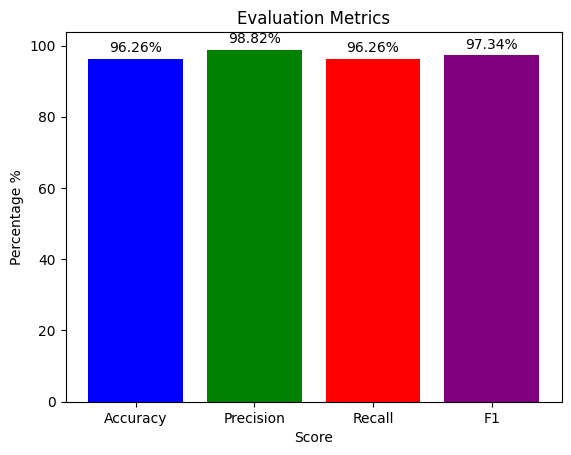

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dự đoán nhãn từ dữ liệu đầu vào
def predict_ner(text):
    entities = ner(text)
    predicted_tags = [entity[3] for entity in entities]
    return predicted_tags

# Đánh giá mô hình
def evaluate_model(test_data):
    predicted_labels = []
    true_labels = []
    
    for idx, row in test_data.iterrows():
        tokens = row['tokens']
        ner_tags = row['ner_tags']  # Đây là nhãn NER
        
        # Dự đoán nhãn thực thể
        predicted_tags = predict_ner(" ".join(tokens))
        
        # Kiểm tra độ dài
        if len(predicted_tags) != len(ner_tags):
            continue  # Bỏ qua các dòng dữ liệu không khớp độ dài
        
        predicted_labels.extend(predicted_tags)
        true_labels.extend(ner_tags)
    
    # Đảm bảo số lượng các nhãn thực thể là như nhau
    assert len(predicted_labels) == len(true_labels), "Số lượng nhãn thực thể không khớp nhau"
    
    # Tính toán các độ đo
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted', labels=list(set(true_labels)))
    recall = recall_score(true_labels, predicted_labels, average='weighted', labels=list(set(true_labels)))
    f1 = f1_score(true_labels, predicted_labels, average='weighted', labels=list(set(true_labels)))
    
    print(f"Độ chính xác: {accuracy:.4f}")
    print(f"Độ chính xác (precision): {precision:.4f}")
    print(f"Độ nhớ (recall): {recall:.4f}")
    print(f"Độ F1-score: {f1:.4f}")
    
    # Dữ liệu để vẽ biểu đồ
    x = ["Accuracy", "Precision", "Recall", "F1"]
    y = [accuracy*100, precision*100, recall*100, f1*100]

    # Vẽ biểu đồ thanh
    plt.bar(x, y, color=['blue', 'green', 'red', 'purple'])

    # Thêm nhãn trục x và y
    plt.xlabel("Score")
    plt.ylabel("Percentage %")
    plt.title("Evaluation Metrics")
    plt.ylim(ymin=0)

    # Hiển thị giá trị phần trăm trên đỉnh các cột
    for i in range(len(x)):
        plt.text(i, y[i] + 1, f'{y[i]:.2f}%', ha='center', va='bottom')

    # Hiển thị đồ thị
    plt.show()

# Đánh giá chất lượng của mô hình trên test data
evaluate_model(df_test)


# 3. Bài 2

## CRF

In [9]:
def word2features(doc, i):
    word = doc['tokens'][i]
    features = {
        'word': word,
        'is_first': i == 0,
        'is_last': i == len(doc['tokens']) - 1,
        'is_capitalized': word[0].upper() == word[0] if word else False,
        'is_all_caps': word.upper() == word if word else False,
        'is_all_lower': word.lower() == word if word else False,
        'prefix-1': word[:1] if word else '',
        'prefix-2': word[:2] if word else '',
        'prefix-3': word[:3] if word else '',
        'suffix-1': word[-1:] if word else '',
        'suffix-2': word[-2:] if word else '',
        'suffix-3': word[-3:] if word else '',
        'prev_word': '' if i == 0 else doc['tokens'][i - 1],
        'next_word': '' if i == len(doc['tokens']) - 1 else doc['tokens'][i + 1],
    }
    return features

def extract_features(doc):
    return [word2features(doc, i) for i in range(len(doc['tokens']))]

def get_labels(doc):
    return doc['ner_tags']

X_train = [extract_features(doc) for _, doc in df_train.iterrows()]
y_train = [get_labels(doc) for _, doc in df_train.iterrows()]

X_test = [extract_features(doc) for _, doc in df_train.iterrows()]
y_test = [get_labels(doc) for _, doc in df_train.iterrows()]


In [ ]:
from sklearn_crfsuite import CRF

# Khởi tạo mô hình CRF
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False
)

# Huấn luyện mô hình CRF
crf.fit(X_train, y_train)

              precision    recall  f1-score   support

       B-LOC       1.00      1.00      1.00       494
      B-MISC       1.00      1.00      1.00        27
       B-ORG       1.00      1.00      1.00       155
       B-PER       1.00      1.00      1.00       873
       I-LOC       1.00      1.00      1.00       247
      I-MISC       1.00      1.00      1.00        27
       I-ORG       1.00      1.00      1.00       128
       I-PER       1.00      1.00      1.00       291
           O       1.00      1.00      1.00      2134

   micro avg       1.00      1.00      1.00      4376
   macro avg       1.00      1.00      1.00      4376
weighted avg       1.00      1.00      1.00      4376
 samples avg       1.00      1.00      1.00      4376

Accuracy: 0.9986
Precision: 0.9995
Recall: 0.9995
F1-score: 0.9995


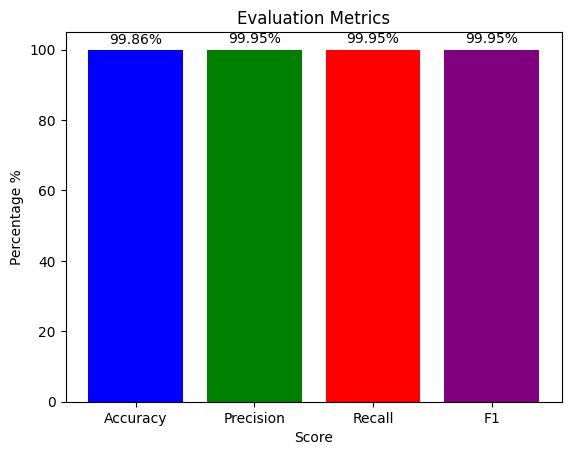

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer

# Giả sử bạn đã có X_test và y_test, cùng với mô hình CRF đã huấn luyện
y_pred = crf.predict(X_test)

# Chuyển đổi nhãn dữ liệu sang dạng số
mlb = MultiLabelBinarizer()
y_test_bin = mlb.fit_transform(y_test)
y_pred_bin = mlb.transform(y_pred)

# Classification report
report = classification_report(y_test_bin, y_pred_bin, target_names=mlb.classes_)
print(report)

# Đánh giá kết quả
accuracy = accuracy_score(y_test_bin, y_pred_bin)
precision = precision_score(y_test_bin, y_pred_bin, average='weighted')
recall = recall_score(y_test_bin, y_pred_bin, average='weighted')
f1 = f1_score(y_test_bin, y_pred_bin, average='weighted')

# In kết quả
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Dữ liệu để vẽ biểu đồ
x = ["Accuracy", "Precision", "Recall", "F1"]
y = [accuracy*100, precision*100, recall*100, f1*100]

# Vẽ biểu đồ thanh
plt.bar(x, y, color=['blue', 'green', 'red', 'purple'])

# Thêm nhãn trục x và y
plt.xlabel("Score")
plt.ylabel("Percentage %")
plt.title("Evaluation Metrics")
plt.ylim(ymin=0)

# Hiển thị giá trị phần trăm trên đỉnh các cột
for i in range(len(x)):
    plt.text(i, y[i] + 1, f'{y[i]:.2f}%', ha='center', va='bottom')

# Hiển thị đồ thị
plt.show()


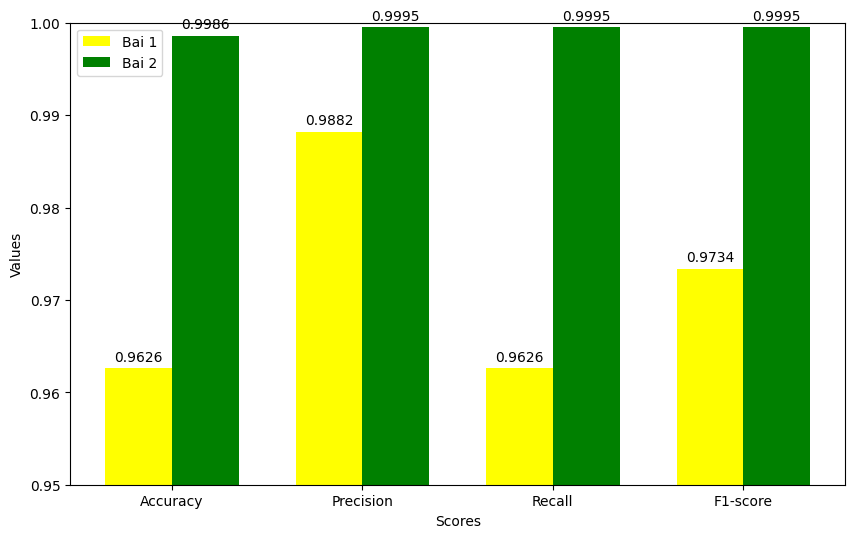

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu từ bài 1 và bài 2
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
bai1_scores = [0.9626, 0.9882, 0.9626, 0.9734]
bai2_scores = [0.9986, 0.9995, 0.9995, 0.9995]

# Chỉ số cho biểu đồ
x = np.arange(len(labels))
width = 0.35

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, bai1_scores, width, label='Bai 1', color='yellow')
rects2 = ax.bar(x + width/2, bai2_scores, width, label='Bai 2', color='green')

# Thêm nhãn trục x và y
ax.set_xlabel('Scores')
ax.set_ylabel('Values')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Thêm giá trị trên cột
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.4f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Hiển thị biểu đồ
plt.ylim(0.95, 1.0)  # Đặt giới hạn cho trục y
plt.show()
